#Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

Pre-Processing

Data loading

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df_houses = pd.read_csv('/content/drive/MyDrive/Projetos/PROJETO SEJA UM DATA SCIENTIST/Project Cyclic/kc_house_data.csv')

In [4]:
df_houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [5]:
df_houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4580301520.865,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
std,2876565571.312,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,1000102.000,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049194.000,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7308900445.000,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [6]:
df_houses.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df_houses.drop(['sqft_living15', 'sqft_lot15', 'id', 'date'], axis=1, inplace=True)

In [8]:
df_houses['price'].max() , df_houses['price'].min()

(7700000.0, 75000.0)

In [9]:
np.unique(df_houses['bedrooms'], return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 33]),
 array([  13,  199, 2760, 9824, 6882, 1601,  272,   38,   13,    6,    3,
           1,    1]))

Visualização dos dados

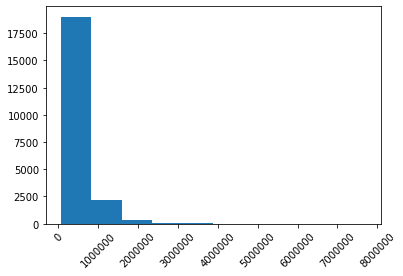

In [10]:

plt.hist(x= df_houses['price']);
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
plt.show()

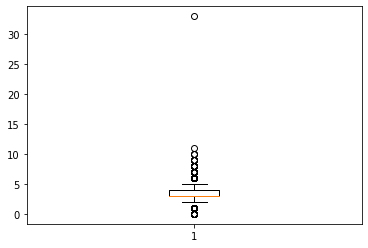

In [11]:
plt.boxplot(np.array(df_houses['bedrooms']));

In [12]:
df_houses.drop(df_houses.loc[df_houses['bedrooms'] == 33].index, inplace=True)

In [13]:
graph = px.scatter_matrix(df_houses, dimensions=['price', 'bedrooms','bathrooms', 'floors'], color='price')
graph.show()

Testar algumas hipóteses

In [14]:
#Compras casas com o preço abaixo da média.
df_houses[df_houses['price'] < df_houses['price'].mean()]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045
6,257500.000,3,2.250,1715,6819,2.000,0,0,3,7,1715,0,1995,0,98003,47.310,-122.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.000,3,2.500,1530,1131,3.000,0,0,3,8,1530,0,2009,0,98103,47.699,-122.346
21609,400000.000,4,2.500,2310,5813,2.000,0,0,3,8,2310,0,2014,0,98146,47.511,-122.362
21610,402101.000,2,0.750,1020,1350,2.000,0,0,3,7,1020,0,2009,0,98144,47.594,-122.299
21611,400000.000,3,2.500,1600,2388,2.000,0,0,3,8,1600,0,2004,0,98027,47.535,-122.069


In [15]:
df_houses_region = df_houses[['price','zipcode']].groupby('zipcode').mean().reset_index()
df_houses_region

,zipcode,price
0,98001,280804.691
1,98002,234284.035
2,98003,294111.279
3,98004,1355927.082
4,98005,810164.875
...,...,...
65,98177,676185.392
66,98178,310612.756
67,98188,289078.346
68,98198,302878.882


In [16]:
result = pd.DataFrame()
for dados in df_houses_region.values:
  a = df_houses[(df_houses['zipcode'] == int(dados[0])) & (df_houses['price'] < dados[1])]
  result = result.append(a.loc[a['price'].isin([a['price'].min()])],ignore_index=True)
result



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,100000.000,2,1.000,770,17334,1.000,0,0,3,7,770,0,1978,0,98001,47.300,-122.269
1,100000.000,2,1.000,910,22000,1.000,0,0,3,6,910,0,1956,0,98001,47.278,-122.252
2,95000.000,1,0.750,760,5746,1.000,0,0,4,5,760,0,1915,0,98002,47.305,-122.215
3,128000.000,3,1.000,910,11117,1.000,0,0,3,7,910,0,1955,0,98003,47.343,-122.309
4,425000.000,4,1.750,1730,11890,1.000,0,0,2,7,980,750,1955,0,98004,47.598,-122.194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,90000.000,2,1.000,580,7500,1.000,0,0,3,5,580,0,1943,0,98178,47.485,-122.251
70,110000.000,2,1.000,790,8250,1.000,0,0,3,6,790,0,1947,0,98188,47.452,-122.286
71,95000.000,2,1.000,800,8550,1.000,0,0,3,7,800,0,1947,0,98198,47.407,-122.294
72,95000.000,2,1.000,960,7000,1.000,0,0,3,4,960,0,1918,0,98198,47.386,-122.307


Para a primeira parte, levei em consideração as casas de valor mais baixo por região para poder comprar e revender a um preço mais próximo a média.

PARTE 2

---



In [17]:
graph = px.scatter_matrix(df_houses, dimensions=['price', 'sqft_lot','sqft_living'], color='price')
graph.show()

In [18]:
graph = px.scatter_matrix(df_houses, dimensions=['price', 'waterfront','condition'], color='price')
graph.show()

In [19]:
graph = px.scatter_matrix(df_houses, dimensions=['price', 'sqft_above','sqft_basement', 'zipcode'], color='price')
graph.show()

In [20]:
graph = px.scatter_matrix(df_houses, dimensions=['price', 'yr_built','yr_renovated','view'], color='price')
graph.show()

In [21]:
df_houses[df_houses['yr_renovated'] > 0]['price'].mean()

760379.0295404814

In [22]:
df_houses[df_houses['yr_renovated'] == 0]['price'].mean()

530355.5210648372

Após as análises dos gráficos, selecionei as features que para mim tem mais valor para uma análise. São elas, bedrooms/bathrooms/sqft_living/condition/zipcode/yr_built e sqft_above. Essas 5 features mais movimentou os preços das casas.

In [23]:
features_importance = pd.DataFrame()
features_importance = df_houses.drop(['view','grade','sqft_basement','yr_built','yr_renovated'], axis=1)

In [24]:
features_importance

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,zipcode,lat,long
0,221900.000,3,1.000,1180,5650,1.000,0,3,1180,98178,47.511,-122.257
1,538000.000,3,2.250,2570,7242,2.000,0,3,2170,98125,47.721,-122.319
2,180000.000,2,1.000,770,10000,1.000,0,3,770,98028,47.738,-122.233
3,604000.000,4,3.000,1960,5000,1.000,0,5,1050,98136,47.521,-122.393
4,510000.000,3,2.000,1680,8080,1.000,0,3,1680,98074,47.617,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.000,3,2.500,1530,1131,3.000,0,3,1530,98103,47.699,-122.346
21609,400000.000,4,2.500,2310,5813,2.000,0,3,2310,98146,47.511,-122.362
21610,402101.000,2,0.750,1020,1350,2.000,0,3,1020,98144,47.594,-122.299
21611,400000.000,3,2.500,1600,2388,2.000,0,3,1600,98027,47.535,-122.069


In [25]:
features_importance['price'].mean()

540083.5187858597

In [26]:
# buy_house = features_importance[(features_importance['bedrooms'] > 3) & (features_importance['bedrooms']<= 7) & (features_importance['price'] < features_importance['price'].mean())
#  & (features_importance['condition'] > 2) & (features_importance['yr_renovated'] == 0) ]

# buy_house

Foi notado que, ao reformar uma casa, o preço médio sobe aproximadamente 230 Mil. Sendo assim, Irei comprar casas que não foram renovadas e com um preço abaixo da media - 230 Mil para conseguir máximar os lucros.

In [27]:
# buy_house[buy_house['price'] < (buy_house['price'].mean() - 230000)]

Fechando a PARTE 2 com a compra de 6 casas com possível 400% de lucro no final.

In [28]:
def graph(y_test, predict):
  fig, ax = plt.subplots(figsize=(10,10))
  ax.scatter(y_test, predict)
  ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=3, color='r')
  ax.set_xlabel('measured')
  ax.set_ylabel('predicted')
  plt.ticklabel_format(style='plain', axis='x')
  plt.ticklabel_format(style='plain', axis='y')

In [29]:
def regression_linear_function(X_train, X_test, y_train, y_test):
  linear_regression = LinearRegression()
  linear_regression.fit(X_train,y_train)
  predict = linear_regression.predict(X_test)
  abs_error = mean_absolute_error(y_test,predict)
  score = linear_regression.score(X_test,y_test)
  return abs_error, predict, score

In [30]:
def svr_function(X_train, X_test, y_train, y_test, stand_scaler):
  svr = SVR()
  svr.fit(X_train,y_train.ravel())
  predict = svr.predict(X_test)
  abs_error = mean_absolute_error(stand_scaler.inverse_transform(y_test),stand_scaler.inverse_transform(predict))
  score = svr.score(X_test,y_test)
  return abs_error, predict, score

In [31]:
def random_forest_function(X_train, X_test, y_train, y_test, stand_scaler = None):
  random_forest = RandomForestRegressor()
  
  random_forest.fit(X_train,y_train)
  predict = random_forest.predict(X_test)
  if stand_scaler == None:
    abs_error = mean_absolute_error(y_test,predict)
  else:
    abs_error = mean_absolute_error(stand_scaler.inverse_transform(y_test),stand_scaler.inverse_transform(predict))
  score = random_forest.score(X_test,y_test)
  return abs_error, predict, score

In [32]:
def neural_network(iter,A,B, X_train, X_test, y_train, y_test, stand_scaler):
  model = MLPRegressor(max_iter=iter,hidden_layer_sizes=(A, B))
  predict = model.fit(X_train, y_train.ravel()).predict(X_test)
  abs_error = mean_absolute_error(stand_scaler.inverse_transform(y_test),stand_scaler.inverse_transform(predict))
  score = model.score(X_test, y_test)
  return abs_error, predict, score

In [33]:
def split(X,y, size, state):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=size, random_state=state)
  return X_train, X_test, y_train, y_test

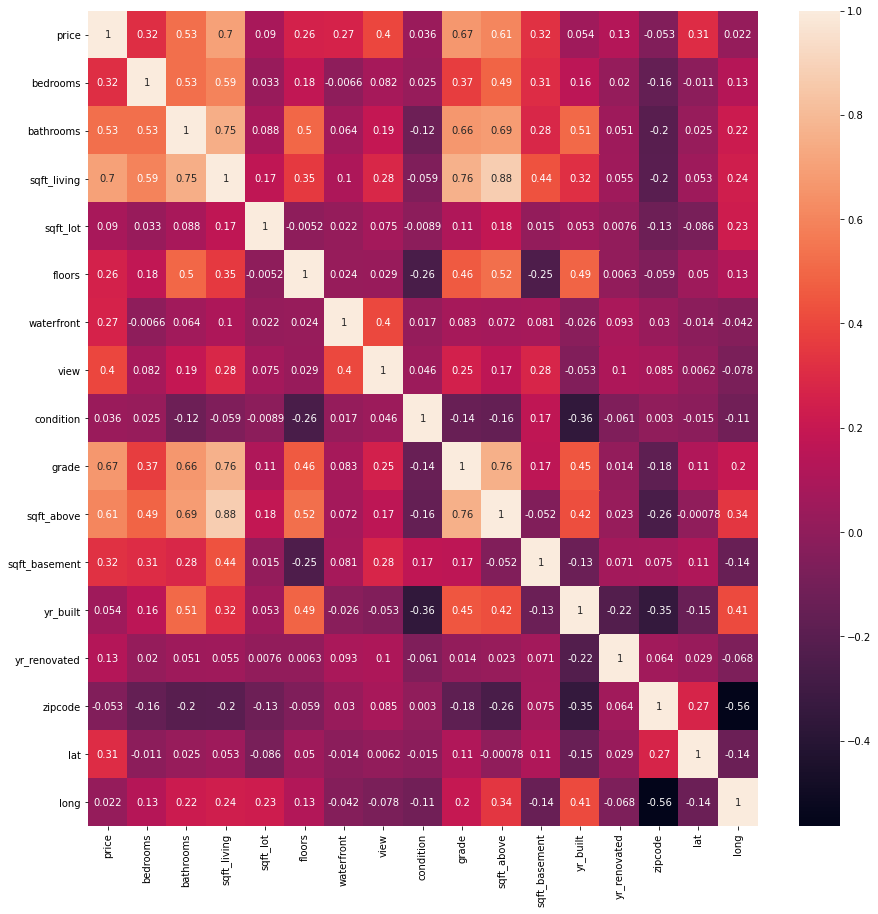

In [34]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(df_houses.corr(), annot = True)

In [35]:
X = df_houses.iloc[:, 1:len(df_houses.columns)]
y = df_houses.iloc[:, 0]

In [36]:
a = df_houses.corr()['price'].values
idx = []
for i,v in enumerate(a):
  if (abs(v) > 0.5):
    print('Feature: %0d, Score: %.5f' % (i,v))
    idx.append(i)

Feature: 0, Score: 1.00000
Feature: 2, Score: 0.52515
Feature: 3, Score: 0.70205
Feature: 9, Score: 0.66745
Feature: 10, Score: 0.60559


In [37]:
linear_regression = LinearRegression()

In [38]:
linear_regression.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
importance = linear_regression.coef_

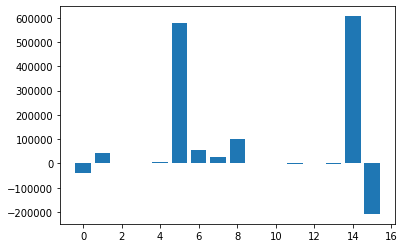

In [40]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [41]:
idx = [0]
for i,v in enumerate(importance):
  if v>= 100:
    print('Feature: %0d, Score: %.5f' % (i,v))
    idx.append(i)

	  

Feature: 1, Score: 42117.82219
Feature: 2, Score: 115.88463
Feature: 4, Score: 4784.42933
Feature: 5, Score: 577547.93620
Feature: 6, Score: 54608.99031
Feature: 7, Score: 25542.04782
Feature: 8, Score: 99396.66432
Feature: 14, Score: 606144.93013


In [42]:
idx

[0, 1, 2, 4, 5, 6, 7, 8, 14]

In [43]:
df_test = df_houses.iloc[:, idx]

In [44]:
df_test

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,zipcode
0,221900.000,3,1.000,5650,1.000,0,0,3,98178
1,538000.000,3,2.250,7242,2.000,0,0,3,98125
2,180000.000,2,1.000,10000,1.000,0,0,3,98028
3,604000.000,4,3.000,5000,1.000,0,0,5,98136
4,510000.000,3,2.000,8080,1.000,0,0,3,98074
...,...,...,...,...,...,...,...,...,...
21608,360000.000,3,2.500,1131,3.000,0,0,3,98103
21609,400000.000,4,2.500,5813,2.000,0,0,3,98146
21610,402101.000,2,0.750,1350,2.000,0,0,3,98144
21611,400000.000,3,2.500,2388,2.000,0,0,3,98027


In [45]:
X_new = df_test.iloc[:,1:len(df_test)]
y_new = df_test.iloc[:,0]
print(X_new)
print(y_new)


       bedrooms  bathrooms  sqft_lot  ...  view  condition  zipcode
0             3      1.000      5650  ...     0          3    98178
1             3      2.250      7242  ...     0          3    98125
2             2      1.000     10000  ...     0          3    98028
3             4      3.000      5000  ...     0          5    98136
4             3      2.000      8080  ...     0          3    98074
...         ...        ...       ...  ...   ...        ...      ...
21608         3      2.500      1131  ...     0          3    98103
21609         4      2.500      5813  ...     0          3    98146
21610         2      0.750      1350  ...     0          3    98144
21611         3      2.500      2388  ...     0          3    98027
21612         2      0.750      1076  ...     0          3    98144

[21612 rows x 8 columns]
0       221900.000
1       538000.000
2       180000.000
3       604000.000
4       510000.000
           ...    
21608   360000.000
21609   400000.000
21610 

192623.12913789414
0.400947461848287


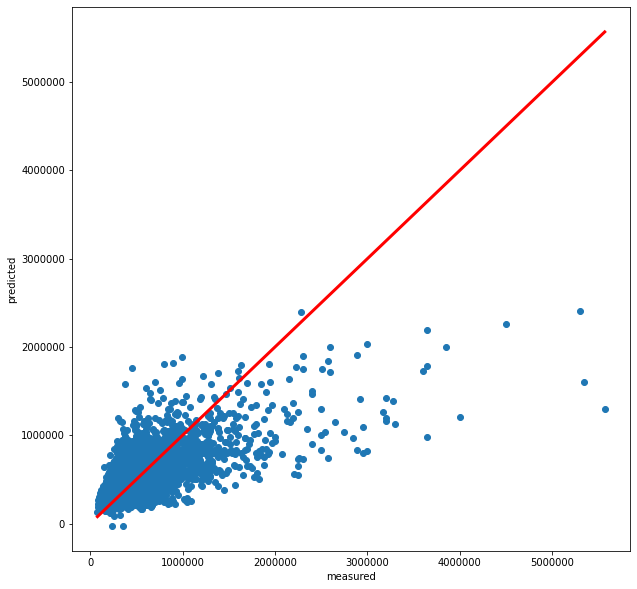

In [46]:
X_train, X_test, y_train, y_test = split(X_new,y_new, 0.25, 42)
error, predict, score = regression_linear_function(X_train, X_test, y_train, y_test)
print(error)
print(score)
graph(y_test, predict)

In [55]:
X_train, X_test, y_train, y_test = split(X,y, 0.25, 42)
poly = PolynomialFeatures(degree=2)

In [56]:
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)


103907.46834320558
0.8034343731058355


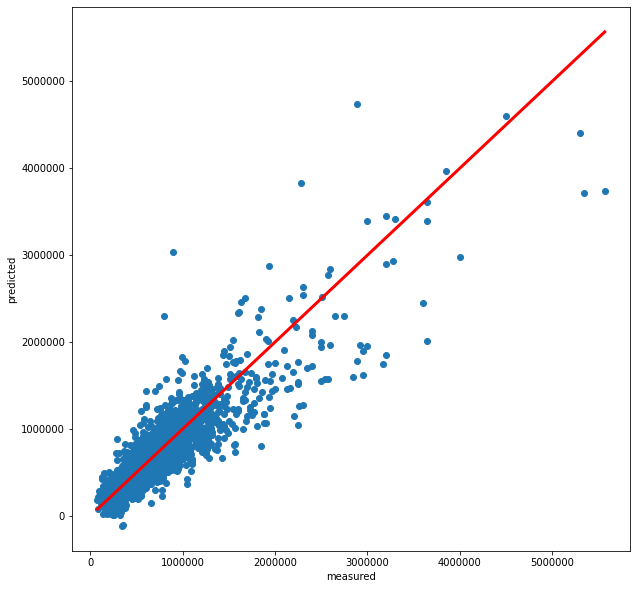

In [57]:
error, predict, score = regression_linear_function(X_poly_train, X_poly_test, y_train, y_test)
print(error)
print(score)
graph(y_test, predict)

71955.62519957607
0.8631670839918485


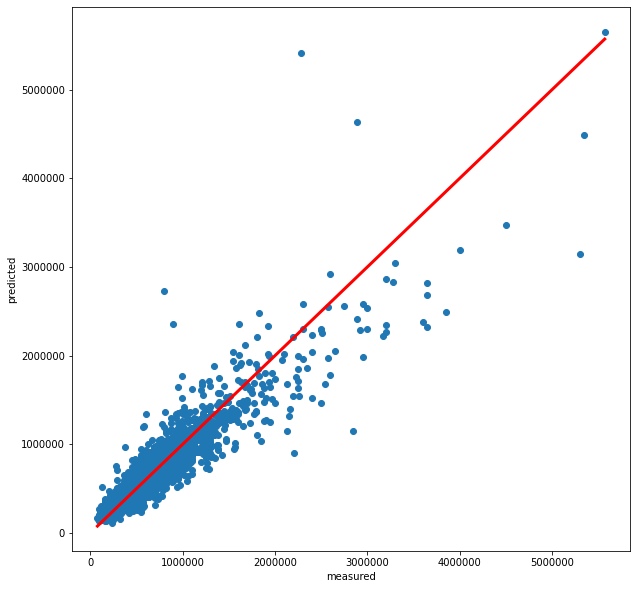

In [50]:
X_train, X_test, y_train, y_test = split(X,y, 0.25, 42)
error, predict, score = random_forest_function(X_train, X_test, y_train, y_test)
print(error)
print(score)
graph(y_test, predict)

In [51]:
stand_scaler = StandardScaler()
X_stand_train = stand_scaler.fit_transform(X_train)
X_stand_test = stand_scaler.fit_transform(X_test)
y_stand_train = stand_scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_stand_test  = stand_scaler.fit_transform(np.array(y_test).reshape(-1,1))

87466.03521705524
0.7544984166996538


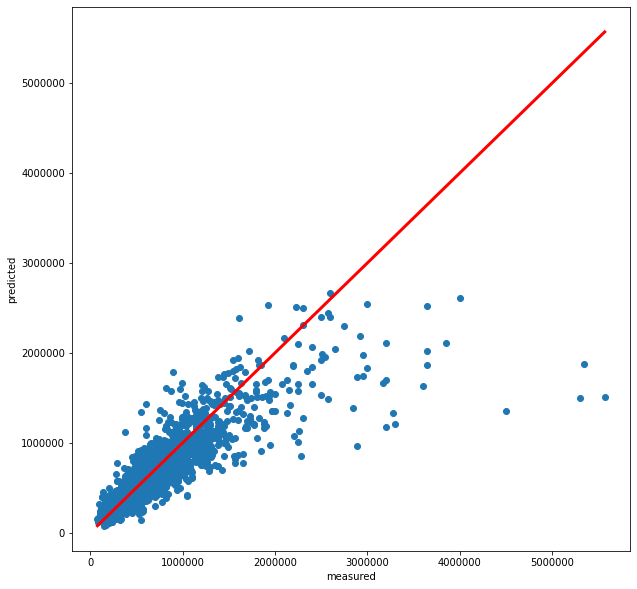

In [52]:
error, predict, score = svr_function(X_stand_train, X_stand_test, y_stand_train, y_stand_test, stand_scaler)
print(error)
print(score)
graph(stand_scaler.inverse_transform(y_stand_test), stand_scaler.inverse_transform(predict))

76047.31016841502
0.8770450601962774


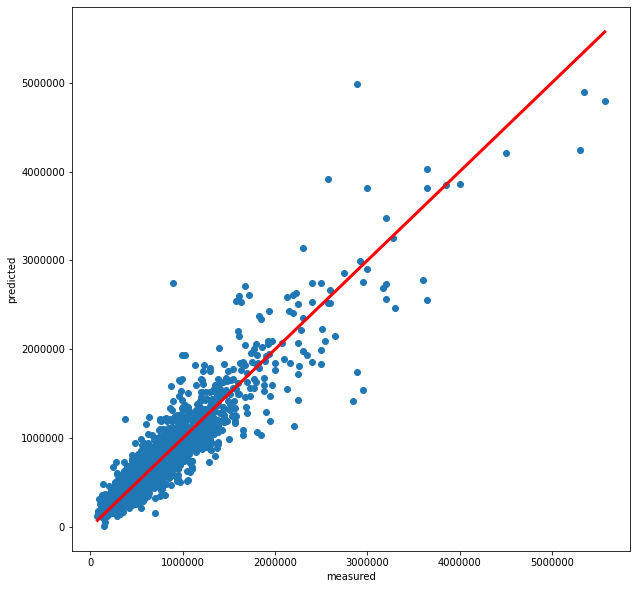

In [53]:
error, predict, score = neural_network(1000,48,24,X_stand_train, X_stand_test, y_stand_train, y_stand_test, stand_scaler)
print(error)
print(score)
graph(stand_scaler.inverse_transform(y_stand_test), stand_scaler.inverse_transform(predict))

75168.52986920944
0.8604237491559686


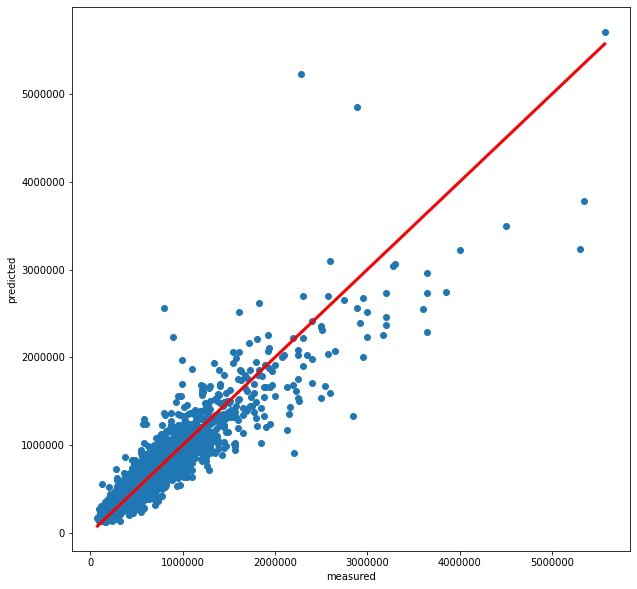

In [54]:
error, predict, score = random_forest_function(X_stand_train, X_stand_test, y_stand_train.ravel(), y_stand_test.ravel(), stand_scaler)
print(error)
print(score)
graph(stand_scaler.inverse_transform(y_stand_test), stand_scaler.inverse_transform(predict))